# Generative adversarial network

Questo notebook è una versione semplificata del codice per la 'vanilla GAN' che trovate qui:
https://github.com/wiseodd/generative-models

Per eseguirlo è sufficiente installare TensorFlow: 
https://www.tensorflow.org/install/

Definiamo le variabili per il discriminatore:

In [37]:
import tensorflow as tf

X = tf.placeholder(tf.float32, shape=[None, 784])

D_W1 = tf.Variable(tf.random_normal(shape=[784, 128], stddev=0.1))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(tf.random_normal(shape=[128, 1], stddev=0.1))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]

Definiamo le variabili per il generatore:

In [38]:
Z = tf.placeholder(tf.float32, shape=[None, 100])

G_W1 = tf.Variable(tf.random_normal(shape=[100, 128], stddev=0.1))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

G_W2 = tf.Variable(tf.random_normal(shape=[128, 784], stddev=0.1))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_W2, G_b1, G_b2]

Una funzione per campionare un possibile ingresso al generatore:

In [39]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

Rete neurale del generatore:

In [40]:
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob

Rete neurale del discriminatore:

In [41]:
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit

Funzioni costo individuali e complessive:

In [42]:
G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)

D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))

Ottimizzazione (si noti come le due funzioni costo vengono aggiornate in maniera alternata):

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from tensorflow.examples.tutorials.mnist import input_data

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

mb_size = 128
Z_dim = 100

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

for it in range(10000):
    
    X_mb, _ = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()

Extracting ../../MNIST_data\train-images-idx3-ubyte.gz
Extracting ../../MNIST_data\train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data\t10k-labels-idx1-ubyte.gz
Iter: 0
D loss: 2.329
G_loss: 1.205

Iter: 1000
D loss: 0.01016
G_loss: 13.69

Iter: 2000
D loss: 0.0108
G_loss: 7.179

Iter: 3000
D loss: 0.003816
G_loss: 7.975

Iter: 4000
D loss: 0.01483
G_loss: 5.927

Iter: 5000
D loss: 0.105
G_loss: 5.521

Iter: 6000
D loss: 0.1269
G_loss: 4.55

Iter: 7000
D loss: 0.241
G_loss: 4.184

Iter: 8000
D loss: 0.3828
G_loss: 3.445

Iter: 9000
D loss: 0.4619
G_loss: 3.355



Funzione per mostrare l'immagine ingrandita:

In [45]:
from io import BytesIO
import PIL.Image
from IPython.display import clear_output, Image, display, HTML

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    image = PIL.Image.fromarray(a)
    display(image.resize((28*5, 28*5)))

Campioniamo il generatore:

In [52]:
sample = sess.run(G_sample, feed_dict={Z: sample_Z(1, Z_dim)})

Mostriamo l'uscita:

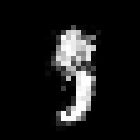

In [53]:
showarray(sample.reshape(28, 28))